In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# define dataset
df = pd.read_csv('car data.csv')

## Preprocessing and EDA

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

[Text(0, 0, '2')]

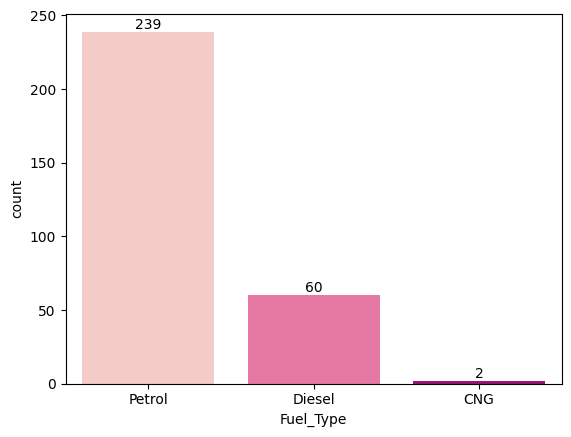

In [6]:
ax1 = sns.countplot(x=df['Fuel_Type'], hue=df['Fuel_Type'],palette='RdPu')
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])

[Text(0, 0, '106')]

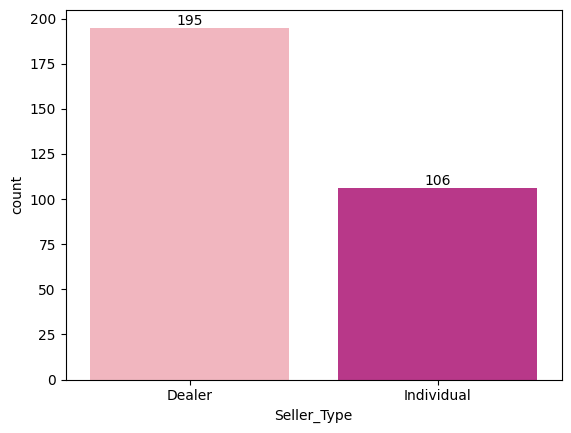

In [7]:
ax2 = sns.countplot(x=df['Seller_Type'], hue=df['Seller_Type'],palette='RdPu')
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])

[Text(0, 0, '40')]

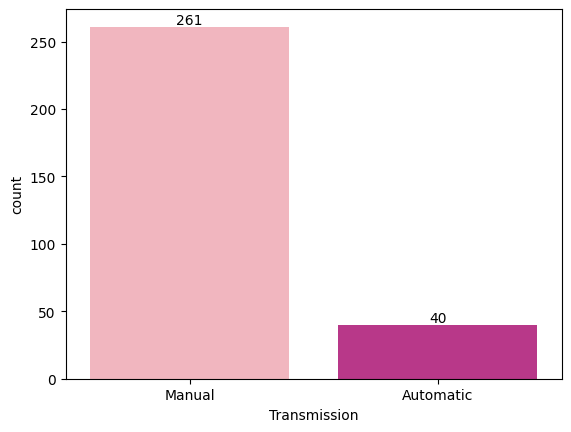

In [8]:
ax3 = sns.countplot(x=df['Transmission'], hue=df['Transmission'],palette='RdPu')
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])

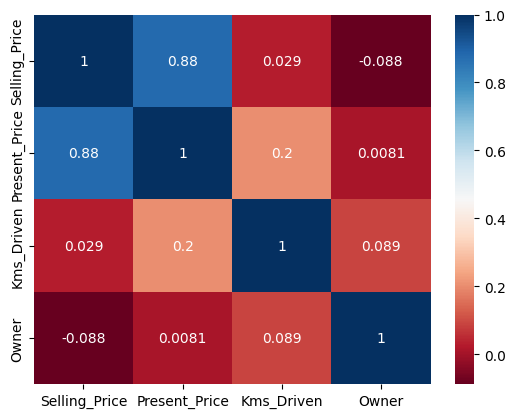

In [9]:
data = df[['Selling_Price','Present_Price','Kms_Driven','Owner']]
sns.heatmap(data.corr(), annot=True, cmap='RdBu')
plt.show()

In [10]:
df.drop(labels='Car_Name',axis=1,inplace=True)

## Train Test Split

In [11]:
df = pd.get_dummies(data = df,drop_first=True) 
X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Model Training

In [12]:
# analysing results with different models to select best model
models = {
    'Lasso' : Lasso(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'Support Vector Machine (SVR)': SVR(),
    'K-Nearest Neighbors (KNeighborsRegressor)': KNeighborsRegressor(),
    'Decision Tree (DecisionTreeRegressor)': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

for name, md in models.items():
    md.fit(X_train,y_train)
    y_pred = md.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} with Mean Squared Error: {mse}")

Lasso with Mean Squared Error: 4.6404897963148
GradientBoostingRegressor with Mean Squared Error: 0.7326596129819108
Support Vector Machine (SVR) with Mean Squared Error: 25.228948710424323
K-Nearest Neighbors (KNeighborsRegressor) with Mean Squared Error: 23.573333770491804
Decision Tree (DecisionTreeRegressor) with Mean Squared Error: 1.2749114754098363
Random Forest Regressor with Mean Squared Error: 0.7896092057377049


In [13]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6993924224461969


## Prediction Model

In [14]:
def car_price_prediction(year, present_price, kms_driven, fuel_type, seller_type, transmission, owner):
    features = pd.DataFrame({
        'Year': [year],
        'Present_Price': [present_price],
        'Kms_Driven': [kms_driven],
        'Fuel_Type': [fuel_type],
        'Seller_Type': [seller_type],
        'Transmission': [transmission],
        'Owner': [owner]
    })

    # Perform one-hot encoding for categorical variables
    features_encoded = pd.get_dummies(features, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])

    # Ensure all columns in X_train are present in features_encoded
    missing_cols = set(X_train.columns) - set(features_encoded.columns)
    if missing_cols:
        features_encoded = features_encoded.reindex(columns=features_encoded.columns.union(missing_cols), fill_value=0)

    # Reorder columns to match training data
    features_encoded = features_encoded[X_train.columns]
    prediction = model.predict(features_encoded)

    return prediction[0]


In [15]:
year = 2020
present_price = 3.5
kms_driven = 45000
fuel_type = 'Petrol'  
seller_type = 'Dealer'  
transmission = 'Manual'  
owner = 0  

predict_price = car_price_prediction(year, present_price, kms_driven, fuel_type, seller_type, transmission, owner)
print("Predicted Price:", predict_price)

Predicted Price: 2.680394441414039


## Values of features can be changed to optain different results.